In [1]:
#Ensure you pip install
#TODO: N-grams 
#Stop word removal and tokenization
#Add any extra text cleaning wanted
#Save to the CSV when all checked so that people can do work in other files
#Currently only works with the cleaned dataset. Lots more work needed for other one
#Get rid of other languages

import pandas as pd
import numpy as np 
import re

pd.set_option('display.max_colwidth', None)

#Replace with your own path
f = open("../data/HateSpeechDataset.csv",'r')
r_cols = ['tweet', 'hate', 'nums']
tweets = pd.read_csv(f, sep=',', names=r_cols)
tweets = tweets[1:]

FileNotFoundError: [Errno 2] No such file or directory: '../data/HateSpeechDataset.csv'

In [ ]:
word_dict = dict()
word_counter = 0

#This is only in english, not sure how many languages are in there...
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
              "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", 
              "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", 
              "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", 
              "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
              "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", 
              "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
              "against", "between", "into", "through", "during", "before", "after", 
              "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", 
              "under", "again", "further", "then", "once", "here", "there", "when", "where", 
              "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", 
              "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", 
              "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [ ]:
counter2 = [0,0,0,0,0,0]
nGrams = [dict(),dict(),dict(),dict(),dict(),dict()]

In [ ]:
#Couple potential additions: 
#Add other domains like .info, .uk, .de etc. There are a couple instances in data where would be nice
#Hyper text transfer protocol seems to Start many of these urls. Probably shouldnt matter because we use naive bayes
#Also, like iloc 532 shows, there are other url components that this doesnt remove, but i dont want to kill the whole tweet
#Any ideas to fix this are appreciated

#Currently just removes urls
def clean_text(text):
    clean_tweet = text + " "
    clean_tweet = re.sub(" http| https", "", clean_tweet)

    clean_tweet = re.sub("hyper text transfer protocol", "", clean_tweet)

    clean_tweet = re.sub("www .* com ", "", clean_tweet)
    clean_tweet = re.sub("www .* org ", "", clean_tweet)
    clean_tweet = re.sub("www .* net ", "", clean_tweet)
    clean_tweet = re.sub("www .* uk ", "", clean_tweet)

    clean_tweet = re.sub(" $", "", clean_tweet)
    return clean_tweet

In [ ]:
#Uses hash table to go through the tweets and assign numbers pretty fast
#Honestly pretty simple, should do with and without stop words for testing

def number_words(text):
    #Im being told by online people it is bad design to use global variables
    #Feel free to fix as wanted
    global word_dict
    global word_counter
    new_numbers = []
    for i in text:
        if i in word_dict:
            new_numbers.append(word_dict[i])
        else:
            word_dict[i] = word_counter
            word_counter = word_counter + 1
            new_numbers.append(word_dict[i])
    return new_numbers

In [ ]:
#Efficiency will be added. JAMES, you must think...
#perhaps another hash table.

def stop_word_removal(text):
    return_text = []
    global stop_words
    for i in range(len(text)):
        if not text[i] in stop_words:
            return_text.append(text[i])
            
    return return_text

In [ ]:
#This one is for making n-grams. Might be moved around to after text preperation
#text is a list of numbers so be cool about it
#Supports up to n = 6

def nGrammify(text_nums, n):
    global nGrams
    global counter2
    myList = []
    for i in range(len(text_nums)-n+1):
        nums = ""
        for j in range(n):
            nums = nums + "^" + str(text_nums[i+j])
        if nums in nGrams[n-1]:
            myList.append(nGrams[n-1][nums])
        else:
            nGrams[n-1][nums] = counter2[n-1]
            counter2[n-1] = counter2[n-1]+1
            myList.append(nGrams[n-1][nums])
    return myList

In [ ]:
# Thanks to https://stackoverflow.com/questions/8023306/get-key-by-value-in-dictionary, so maybe not dicts? idk
searched_gram = 0
for key, val in nGrams[1].items():
    if val == searched_gram:
        print(key)
        break

searched_word = 1303
for key, val in word_dict.items():
    if val == searched_word:
        print(key)
        #We can break because there really should only be 1
        break

In [ ]:
#These are all split up so you can test whatever you want to do
tweets['tweet'] = tweets['tweet'].apply(clean_text)

In [ ]:
tweets['splits'] = tweets['tweet'].str.split()

In [ ]:
tweets['newNum'] = tweets['splits'].apply(number_words)

In [ ]:
#This takes a while.
tweets['noStop'] = tweets['splits'].apply(stop_word_removal)

In [ ]:
#this takes a while too. Not too long that I couldnt be convinced to ditch dictionaries
tweets['2_grams'] = tweets['newNum'].apply(lambda x: nGrammify(x, 2))

In [ ]:
#hashtag print any collumn you want :) these functions should be used with each other and can help out the old data visualization too

In [ ]:
#We should only run this line once are done with everything we want to do
tweets.to_csv("finished_hate_speech.csv")

In [ ]:
#Going to make figures based on n-grams and word counts next...
#Make sure to pip install matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set_theme(style="darkgrid")

In [ ]:
tweets.head()

,tweet,hate,nums,splits,newNum,noStop,2_grams
1,denial of normal the con be asked to comment on tragedies an emotional retard,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 146714]","[denial, of, normal, the, con, be, asked, to, comment, on, tragedies, an, emotional, retard]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[denial, normal, con, asked, comment, tragedies, emotional, retard]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
2,just by being able to tweet this insufferable bullshit proves trump a nazi you vagina,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 146714]","[just, by, being, able, to, tweet, this, insufferable, bullshit, proves, trump, a, nazi, you, vagina]","[14, 15, 16, 17, 7, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]","[able, tweet, insufferable, bullshit, proves, trump, nazi, vagina]","[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]"
3,that is retarded you too cute to be single that is life,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28, 29, 34, 146714]","[that, is, retarded, you, too, cute, to, be, single, that, is, life]","[28, 29, 30, 26, 31, 32, 7, 5, 33, 28, 29, 34]","[retarded, cute, single, life]","[27, 28, 29, 30, 31, 32, 33, 34, 35, 27, 36]"
4,thought of a real badass mongol style declaration of war the attackers capture a citizen of the soon to be,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41, 3, 42, 43, 24, 44, 1, 3, 45, 7, 5, 146714]","[thought, of, a, real, badass, mongol, style, declaration, of, war, the, attackers, capture, a, citizen, of, the, soon, to, be]","[35, 1, 24, 36, 37, 38, 39, 40, 1, 41, 3, 42, 43, 24, 44, 1, 3, 45, 7, 5]","[thought, real, badass, mongol, style, declaration, war, attackers, capture, citizen, soon]","[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 33]"
5,afro american basho,1,"[146715, 46, 47, 48, 146714]","[afro, american, basho]","[46, 47, 48]","[afro, american, basho]","[55, 56]"


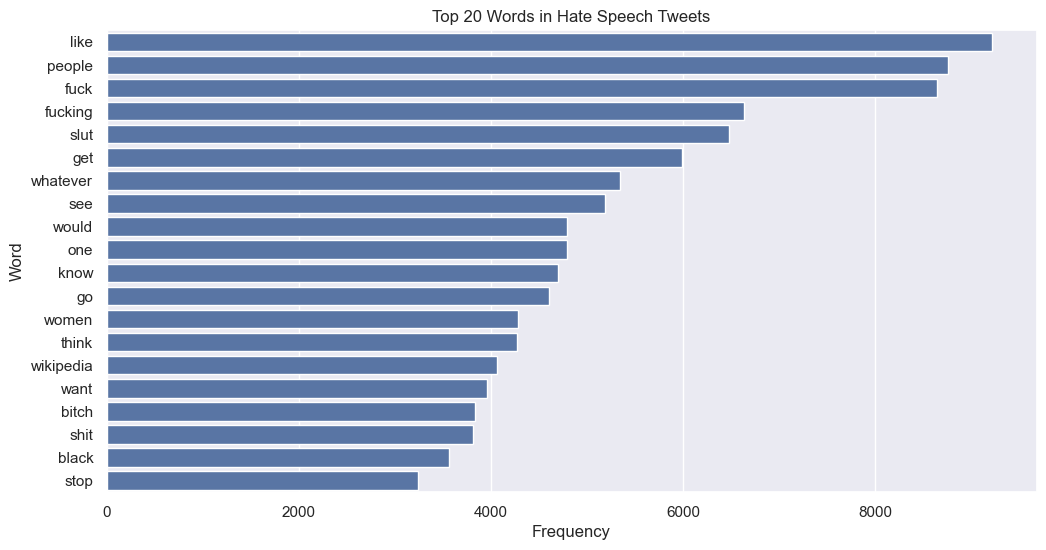

In [ ]:
# Filter tweets labeled as hate speech
hate_tweets = tweets[tweets['hate'] == "1"]

# Flatten all words from noStop column of hate tweets
all_hate_words = [word for sublist in hate_tweets['noStop'] for word in sublist]

# Count frequency
hate_word_counts = Counter(all_hate_words)

# Get top 20 most common words
top_hate_words = dict(hate_word_counts.most_common(20))

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=list(top_hate_words.values()), y=list(top_hate_words.keys()))
plt.title("Top 20 Words in Hate Speech Tweets")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

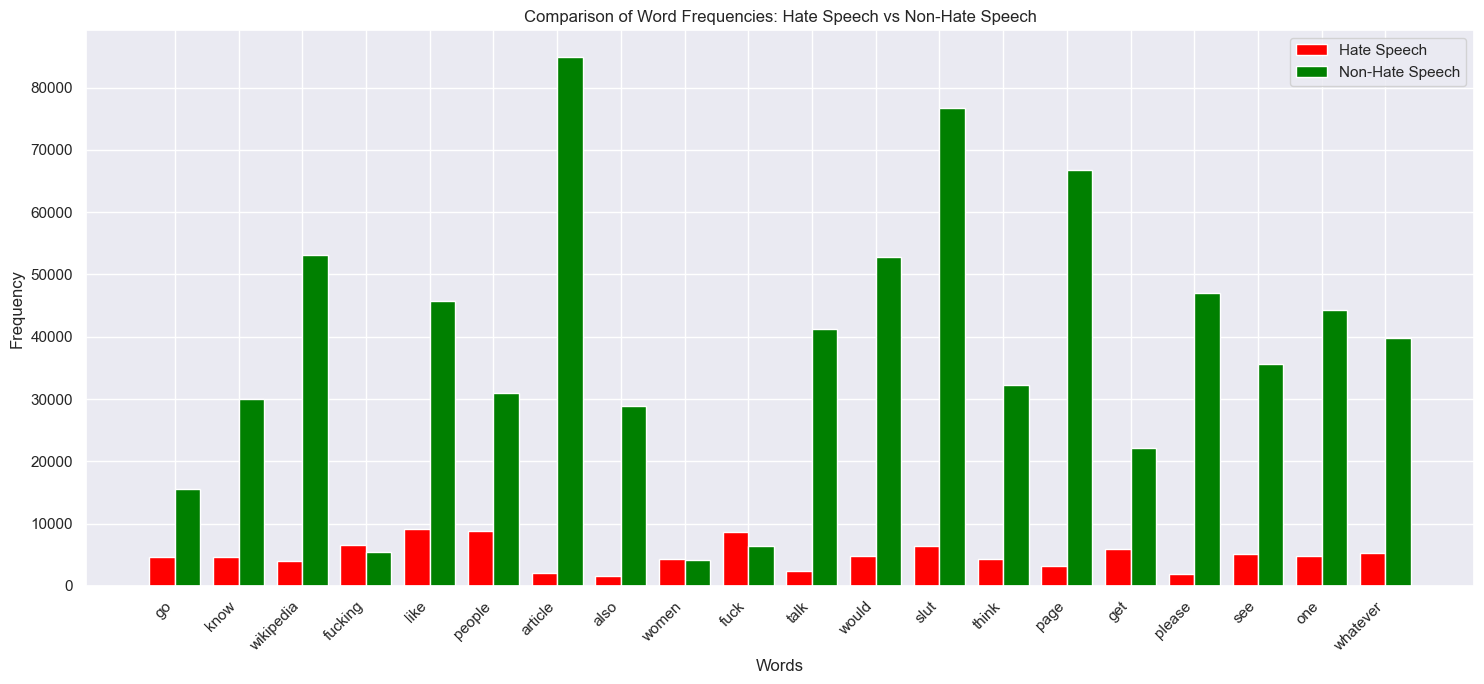

In [ ]:
#Word frequency figure side by side bar chart

# Separate hate and non-hate tweets
hate_tweets = tweets[tweets['hate'] == "1"]
non_hate_tweets = tweets[tweets['hate'] == "0"]

hate_words = [word for sublist in hate_tweets['noStop'] for word in sublist]
non_hate_words = [word for sublist in non_hate_tweets['noStop'] for word in sublist]

# Count frequency for each category
hate_counts = Counter(hate_words)
non_hate_counts = Counter(non_hate_words)

# Get top 15 words from each
top_hate = [word for word, count in hate_counts.most_common(15)]
top_non_hate = [word for word, count in non_hate_counts.most_common(15)]

# Union top words for both categories so we can compare
all_top_words = list(set(top_hate + top_non_hate))

# get frequencies for all top words
hate_freqs = [hate_counts.get(word, 0) for word in all_top_words]
non_hate_freqs = [non_hate_counts.get(word, 0) for word in all_top_words]

# Plot side by side so we can compare
x = np.arange(len(all_top_words))
width = 0.4

plt.figure(figsize=(15,7))
plt.bar(x - width/2, hate_freqs, width, label='Hate Speech', color='red')
plt.bar(x + width/2, non_hate_freqs, width, label='Non-Hate Speech', color='green')
plt.xticks(x, all_top_words, rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Comparison of Word Frequencies: Hate Speech vs Non-Hate Speech")
plt.legend()
plt.tight_layout()
plt.show()

['what a', 'a slut', 'of the', 'it is', 'i am', 'in the', 'do not', 'if you', 'you are', 'i have', 'to the', 'on the', 'the article', 'to be', 'is a', 'is not', 'you have', 'does not', 'that is', 'i do']


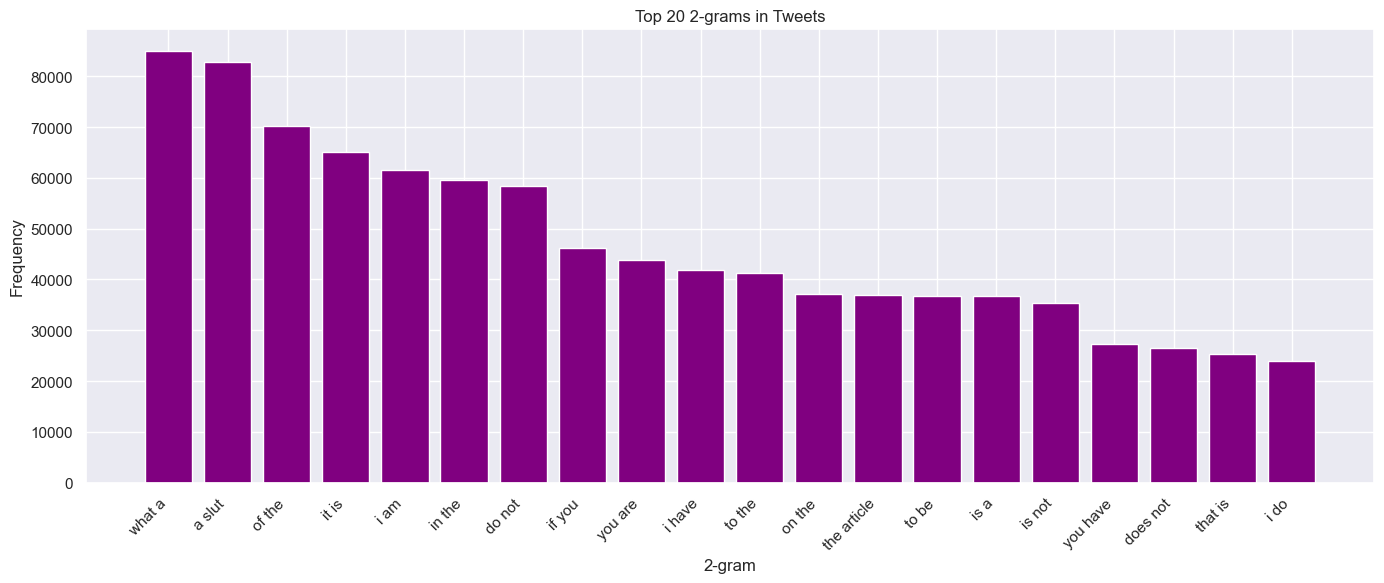

In [ ]:
#2 gram frequency figure with stop words
reverse_2gram = {v: k for k, v in nGrams[1].items()}

all_2grams_ids = [ng_id for sublist in tweets['2_grams'] for ng_id in sublist]

ngram_counts = Counter(all_2grams_ids)

top_20 = ngram_counts.most_common(20)

# Prepare readable labels and counts
labels = []
counts = []

for ng_id, count in top_20:
    ng_string = reverse_2gram[ng_id]
    
    word_ids = [int(x) for x in ng_string.split("^")[1:]]  # skip empty first element
    
    # Map IDs to words
    words = [key for wid in word_ids for key, val in word_dict.items() if val == wid]
    
    labels.append(" ".join(words))  # Join words for axis label
    counts.append(count)

print(labels)

plt.figure(figsize=(14,6))
plt.bar(range(len(top_20)), counts, color='purple')
plt.xticks(range(len(top_20)), labels, rotation=45, ha='right')
plt.title("Top 20 2-grams in Tweets")
plt.xlabel("2-gram")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



In [ ]:
print(word_dict)

{'denial': 0, 'of': 1, 'normal': 2, 'the': 3, 'con': 4, 'be': 5, 'asked': 6, 'to': 7, 'comment': 8, 'on': 9, 'tragedies': 10, 'an': 11, 'emotional': 12, 'retard': 13, 'just': 14, 'by': 15, 'being': 16, 'able': 17, 'tweet': 18, 'this': 19, 'insufferable': 20, 'bullshit': 21, 'proves': 22, 'trump': 23, 'a': 24, 'nazi': 25, 'you': 26, 'vagina': 27, 'that': 28, 'is': 29, 'retarded': 30, 'too': 31, 'cute': 32, 'single': 33, 'life': 34, 'thought': 35, 'real': 36, 'badass': 37, 'mongol': 38, 'style': 39, 'declaration': 40, 'war': 41, 'attackers': 42, 'capture': 43, 'citizen': 44, 'soon': 45, 'afro': 46, 'american': 47, 'basho': 48, 'yeah': 49, 'haha': 50, 'ching': 51, 'chong': 52, 'chung': 53, 'stuff': 54, 'dead': 55, 'what': 56, 'slut': 57, 'still': 58, 'warm': 59, 'when': 60, 'she': 61, 'tweeted': 62, 'it': 63, 'her': 64, 'mate': 65, 'obama': 66, 'who': 67, 'sent': 68, 'fucking': 69, 'lowlife': 70, 'let': 71, 'your': 72, 'tweets': 73, 'harmless': 74, 'will': 75, 'not': 76, 'affect': 77, 'me

C:\Users\jewel\AppData\Local\Temp\ipykernel_9200\3431725385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_tweets['2grams_noStop'] = hate_tweets['noStop'].apply(lambda x: generate_ngrams(x, n=2))


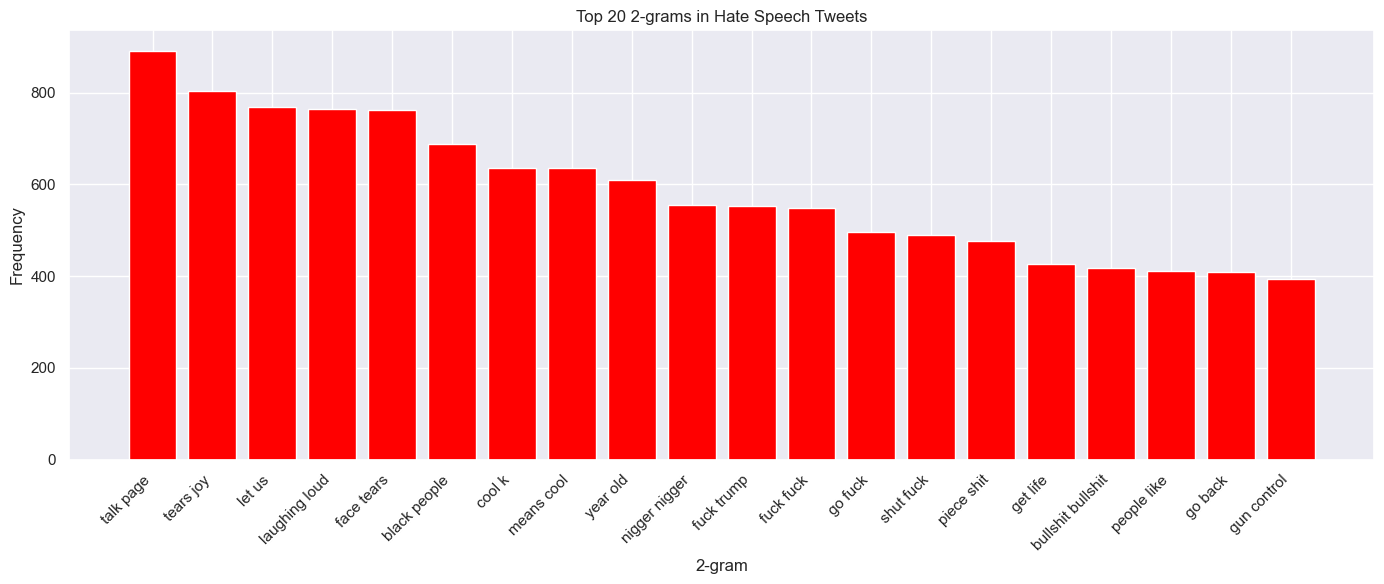

In [ ]:
# N grams figure without stop words and only in hate speech tweets
# Filter hate speech tweets 
hate_tweets = tweets[tweets['hate'] == "1"]

def generate_ngrams(words, n=2):
    return [" ".join(words[i:i+n]) for i in range(len(words)-n+1)]

hate_tweets['2grams_noStop'] = hate_tweets['noStop'].apply(lambda x: generate_ngrams(x, n=2))

all_2grams_hate = [ng for sublist in hate_tweets['2grams_noStop'] for ng in sublist]

ngram_counts_hate = Counter(all_2grams_hate)

top_20_hate_ngrams = dict(ngram_counts_hate.most_common(20))

plt.figure(figsize=(14,6))
plt.bar(range(len(top_20_hate_ngrams)), top_20_hate_ngrams.values(), color='red') 
plt.xticks(range(len(top_20_hate_ngrams)), top_20_hate_ngrams.keys(), rotation=45, ha='right')
plt.title("Top 20 2-grams in Hate Speech Tweets")
plt.xlabel("2-gram")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("check")
print(" ")